In [1]:
# reading libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# reading datasets from pre-processed python files
df_1 = pd.read_csv('Data/preprocessed_data/maxi_data/m_kleber_all_games_data.csv')
df_2 = pd.read_csv('Data/preprocessed_data/maxi_data/maxi_kleber_series_games(jazz_gsw)_data.csv')

# replacing makes by 1 and misses by 0, for further analysis
df_1['misses/count_binary'] = np.where(df_1['misses/count'] == 'makes', 1, 0)
df_2['misses/count_binary'] = np.where(df_2['misses/count'] == 'makes', 1, 0)

# considering only 2-pt and 3-pt
df_to_use_1 = df_1[df_1['basket_type'] != 'free']
df_to_use_2 = df_2[df_2['basket_type'] != 'free']

# combining above two dataframes
combine_df = pd.concat([df_to_use_1, df_to_use_2])
combine_df['oponent_team'].fillna('suns', inplace=True)

# calculating streak of shorts using groupby and shift libraries
combine_df['streak'] = combine_df['misses/count_binary'].groupby((combine_df['misses/count_binary'] != combine_df.groupby(['Series Game', 'oponent_team'])['misses/count_binary'].shift()).cumsum()).cumcount() + 1

# calculating a freequency matrix using crosstab function between makes/misses count and short streaks
cross_streak_df = pd.crosstab(combine_df['misses/count'], combine_df['streak'])
cross_streak_df = cross_streak_df.reset_index()
cross_streak_df['Total'] = cross_streak_df.sum(axis = 1)
print(cross_streak_df)

# creating a new dataframe for calculating the convergence probablilities (total number of shorts / previous total shorts)
prob_df = pd.DataFrame()
prob_df['streak'] = [1, 2, 3, 4]
prob_df['converg_prob'] = [0.574, 0.355, 0.637, 0.714] # (for 1st 31 / 54 = 0.574, 11 / 31(previous total shorts))

streak misses/count   1   2  3  4  5  Total
0             makes  31  11  7  5  0     54
1            misses  31  12  5  3  1     52


In [6]:
df_1 = pd.read_csv('Data/preprocessed_data/maxi_data/m_kleber_all_games_data.csv')
df_1.head()

,Time,player_name,Series Game,Score,quarter,basket_type,short_type,short_range,misses/count,player_team,Assist,Assist_by,Time_dumy
0,4:12.0,M.Kleber,1,10-22,1.0,3-pt,jump,24,makes,Dallas,assist,Doncic,2022-06-03 04:12:00
1,3:08.0,M.Kleber,1,15-26,1.0,3-pt,jump,25,makes,Dallas,assist,Doncic,2022-06-03 03:08:00
2,1:33.0,M.Kleber,1,21-31,1.0,3-pt,jump,23,makes,Dallas,assist,Dinwiddie,2022-06-03 01:33:00
3,11:19.0,M.Kleber,1,28-37,2.0,3-pt,jump,27,makes,Dallas,assist,Dinwiddie,2022-06-03 11:19:00
4,10:12.0,M.Kleber,1,31-40,2.0,3-pt,jump,28,misses,Dallas,NaN,NaN,2022-06-03 10:12:00


In [5]:
df_1.head()

,Time,player_name,Series Game,Score,quarter,basket_type,short_type,short_range,misses/count,player_team,Assist,Assist_by,Time_dumy,misses/count_binary
0,4:12.0,M.Kleber,1,10-22,1.0,3-pt,jump,24,makes,Dallas,assist,Doncic,2022-06-03 04:12:00,1
1,3:08.0,M.Kleber,1,15-26,1.0,3-pt,jump,25,makes,Dallas,assist,Doncic,2022-06-03 03:08:00,1
2,1:33.0,M.Kleber,1,21-31,1.0,3-pt,jump,23,makes,Dallas,assist,Dinwiddie,2022-06-03 01:33:00,1
3,11:19.0,M.Kleber,1,28-37,2.0,3-pt,jump,27,makes,Dallas,assist,Dinwiddie,2022-06-03 11:19:00,1
4,10:12.0,M.Kleber,1,31-40,2.0,3-pt,jump,28,misses,Dallas,NaN,NaN,2022-06-03 10:12:00,0


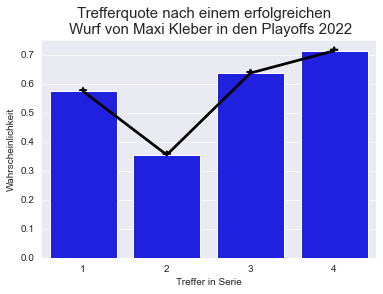

In [4]:
# creating bar plot and pointplot using seaborn 
sns.set_style('darkgrid')
ax = sns.barplot(x = 'streak', y = 'converg_prob', data = prob_df, color = 'b')
ax = sns.pointplot(x = 'streak', y = 'converg_prob', data = prob_df, color = 'black', markers = '*')
ax.set(xlabel='Treffer in Serie', ylabel='Wahrscheinlichkeit')
ax.set_title('Trefferquote nach einem erfolgreichen  \n Wurf von Maxi Kleber in den Playoffs 2022', fontsize= 15)
# plt.show()
plt.savefig('maxi.png', bbox_inches='tight', dpi = 120)